# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# Use "pip install citipy"
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
x = 0
while x < 5:
    print(cities[x])
    x += 1
#Make URL with api key and imperial units to get Fahrenheit temperatures
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

#Make lists to store city name, cloudiness, country, date, humidity, lat, lng, max temp, and wind speed
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
mTemp = []
windSpd = []

#Make for loop 
z=0
while z < 5:
    for x in cities:
#print out string that says it's searching for the city
#Starter while loop to test code before pulling big numbers
    
        print(f"Searching for {x} at index {z}..." )
#Make new url by adding city to end of URL

        response = requests.get(url+x).json()
        #Try to append the name to list by response['name']
        try:
            name.append(response['name'])
            clouds.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            mTemp.append(response['main']['temp_max'])
            windSpd.append(response['wind']['speed'])
        #Except if name doesn't exist in list
        #print out that the city wasn't found
        except:
            print("City does not exist. Skipping...")
            z += 1
            pass
        z += 1
        #Next city


7...
Searching for bredasdorp at index 158...
Searching for ostrovnoy at index 159...
Searching for saint george at index 160...
Searching for lagoa at index 161...
Searching for upernavik at index 162...
Searching for tumannyy at index 163...
City does not exist. Skipping...
Searching for vanavara at index 165...
Searching for verkhnyaya inta at index 166...
Searching for karaul at index 167...
City does not exist. Skipping...
Searching for gornyy at index 169...
Searching for dubbo at index 170...
Searching for leningradskiy at index 171...
Searching for moranbah at index 172...
Searching for anchorage at index 173...
Searching for gushikawa at index 174...
Searching for cody at index 175...
Searching for yekaterinoslavka at index 176...
Searching for eureka at index 177...
Searching for qaanaaq at index 178...
Searching for bijie at index 179...
Searching for souillac at index 180...
Searching for saskylakh at index 181...
Searching for ust-nera at index 182...
Searching for la tuqu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#Make dictionaries of the list of the city weather properties
weather_dict ={
    "Name":name,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Latitude":lat,
    "Longtidue":lng,
    "Max Temp": mTemp,
    "Wind Speed":windSpd
}
#Make dataframe from the list
weather_data = pd.DataFrame(weather_dict)

#Print the DataFrame
weather_data.head()


Name  Cloudiness Countr        Date  Humidity  Latitude  Longtidue  \
0       Kapaa          75     US  1583978582        69     22.08    -159.32   
1      Lompoc           1     US  1583978646        67     34.64    -120.46   
2    Tasiilaq          95     GL  1583978607        51     65.61     -37.64   
3  Nkhotakota          86     MW  1583978887        76    -12.93      34.30   
4      Albany          75     US  1583978770        51     42.60     -73.97   

   Max Temp  Wind Speed  
0     80.60       10.29  
1     64.00        8.05  
2     12.20       14.99  
3     79.65       13.71  
4     39.00        5.82

In [22]:
#Print out the dataframe
weather_data.to_csv("output_data/cities.csv",index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

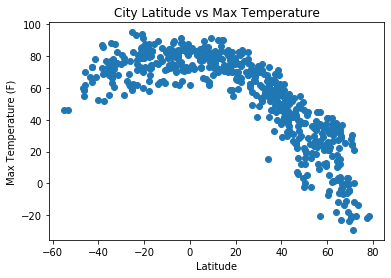

In [23]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.show()

#### Latitude vs. Humidity Plot

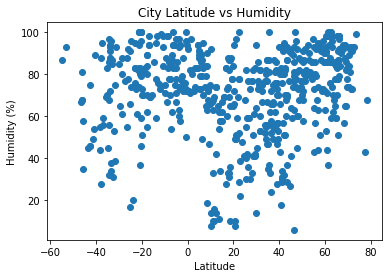

In [24]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

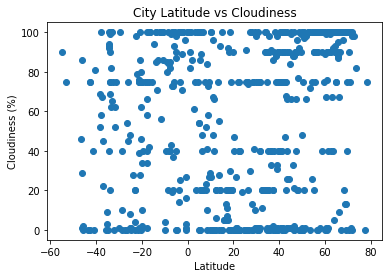

In [25]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

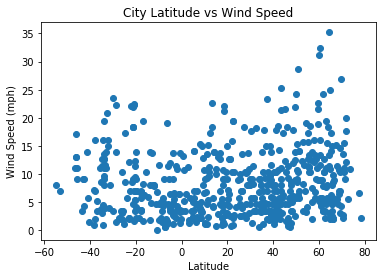

In [26]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [55]:
# OPTIONAL: Create a function to create Linear Regression plots
def LinReg(x,y):
    #Using scipy stats to make linear regression equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept

    #Make the line
    global line_eq
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    r_squared = rvalue*rvalue
    print("The r squared value is: " + str(r_squared))


In [29]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
south_df = weather_data.loc[weather_data["Latitude"] <= 0,:]
print(north_df.head())
print(south_df.head())

Name  Cloudiness Countr        Date  Humidity  Latitude  Longtidue  \
0     Kapaa          75     US  1583978582        69     22.08    -159.32   
1    Lompoc           1     US  1583978646        67     34.64    -120.46   
2  Tasiilaq          95     GL  1583978607        51     65.61     -37.64   
4    Albany          75     US  1583978770        51     42.60     -73.97   
5      Atar           0     MR  1583979025         8     20.52     -13.05   

   Max Temp  Wind Speed  
0      80.6       10.29  
1      64.0        8.05  
2      12.2       14.99  
4      39.0        5.82  
5      66.9        6.46  
           Name  Cloudiness Countr        Date  Humidity  Latitude  Longtidue  \
3    Nkhotakota          86     MW  1583978887        76    -12.93      34.30   
6       Mataura           1     NZ  1583979025        68    -46.19     168.86   
9   East London         100     ZA  1583979026        85    -33.02      27.91   
13      Rikitea           4     PF  1583979026        76    -23.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is: 0.7795343602809334


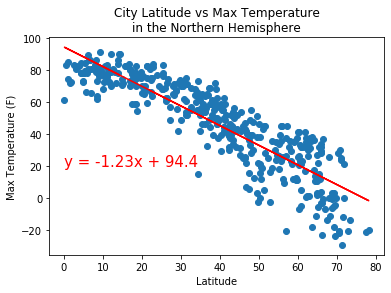

In [58]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature\nin the Northern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Max Temp'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is: 0.2110767088570152


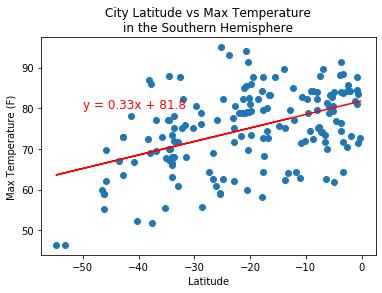

In [59]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature\nin the Southern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Max Temp'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is: 0.0881657205750145


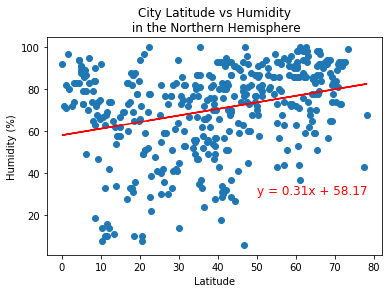

In [62]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity\n in the Northern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Humidity'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is: 0.08626109603401348


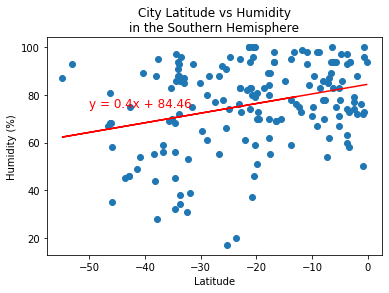

In [66]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity\nin the Southern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Humidity'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-50,75),fontsize=12,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is: 0.09090651218671045


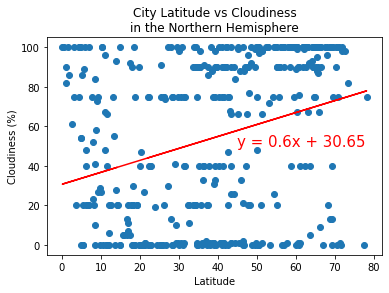

In [69]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness\nin the Northern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Cloudiness'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is: 0.030111505159962915


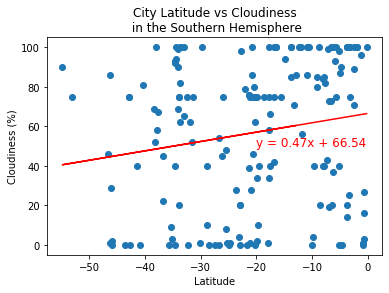

In [72]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness\n in the Southern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Cloudiness'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-20,50),fontsize=12,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is: 0.03923769126343472


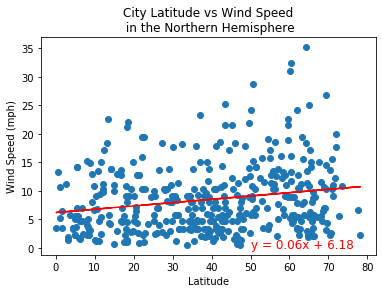

In [77]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed\n in the Northern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Wind Speed'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(50,0),fontsize=12,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is: 0.07161670833123611


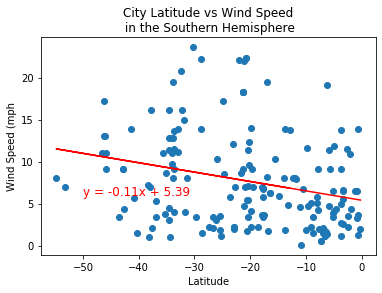

In [79]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph")
plt.title("City Latitude vs Wind Speed\n in the Southern Hemisphere")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Wind Speed'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-50,6),fontsize=12,color="red")
plt.show()